# Jupyter Notebooks
<img src="images/jupyter.svg" style="background:none; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="250px" height="250px">

* Previously known as "IPython notebooks"

## What's good about notebooks?

* They can run any Python (or other languages, like Kotlin) that you want
* They are "rich" documents (i.e., they include LaTeX, plots, sounds, animations, etc.)
* They are easily shared (just put them on github or anywhere else on the internet)
* They are easy to maintain (they are just JSON files, no fancy database or anything required)

## Introduction to Jupyter Notebooks

Jupyter notebooks consists of cells that can be run at any time by pressing `Shift+Enter` while selecting the cell.

To get started, use your terminal to navigate to the desired folder (using `cd`).

Create Python virtual environment:
```bash
$ virtualenv venv
```

Activate the virtual environment:
```bash
$ source ./venv/bin/activate
```

> Note: You need to activate the environment to install a package needed to render Cells in IDE

Install required libraries to your virtual environment:
```bash
$ python -m pip install --upgrade pip setuptools wheel
$ pip install ipykernel
```

Create a notebook (empty file with `*.ipynb` extension), and start typing Python code & hit shift-enter (or control-enter)

In [1]:
x = 2
print(x)

2


This makes prototyping code simple and fast.

## Some Tips
Try the "multi select" mode (hold down cmd or ctrl while clicking on different parts of text in a cell) - every keystroke goes to *all* of the cursors.

Use `?` to get help on a function - it appears in a pop-up bar at the bottom of the notebook

## Markdown
Also, as you can notice, it is possible to add Markdown cells in between cells with code to explain what is going on.

## Run shell commands
You can also ask Jupyter to execute a shell command using `!` before the command.

In [2]:
!ls

01-basics.ipynb     03-jupyter.ipynb    example_package     images
02-virtualenv.ipynb env                 hello.py


> Note: `%%capture` is used to suppress output

In [1]:
%%capture
!ls

## Magic functions

Working with Jupyter notebooks does not take much practice.
However, these notebooks also come with special 'magic' functions. You saw one above.

Magic functions always start with the `%` sign.
There are quite a few, let's examine some.

For a complete list check out the `%magic` function.

You can use magic function `%pip` to install the libraries in the right environment.

In [4]:
%%capture
%pip install numpy matplotlib

In [5]:
%history

x = 2
print(x)
!ls
%%capture
# capture is used to suppress output :)
!ls
%%capture
%pip install numpy matplotlib
%history


In [6]:
%ls

01-basics.ipynb      env/                 images/
02-virtualenv.ipynb  example_package/
03-jupyter.ipynb     hello.py


In [7]:
%cat hello.py

print("hello, world!")

In [8]:
%run hello.py
# Later we will see a beteer way to include Python code in notebooks

hello, world!


## Cool features
### Show plots

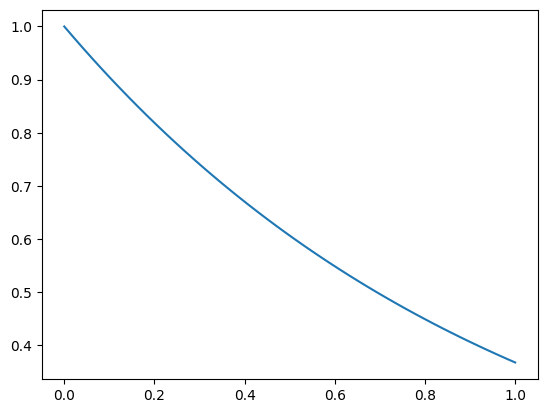

In [9]:
# needed to render plots in the nootebooks
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1)
y = np.exp(-x)

plt.plot(x, y)

### Render LaTeX
```
$M(r) = - \frac{r \sigma^2}{G} 
          \left[ \frac{d \ln \nu}{d \ln r} + 
                 \frac{d \ln \sigma^2}{d \ln r} + 
                  2 \beta(r)
          \right]$
 ```

$M(r) = - \frac{r \sigma^2}{G} 
          \left[ \frac{d \ln \nu}{d \ln r} + 
                 \frac{d \ln \sigma^2}{d \ln r} + 
                  2 \beta(r)
          \right]$

### Embed images
Can use Markdown, HTML or Python syntax

#### HTML
```
<img src="images/jupyter.svg" style="background:none; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="250px" height="250px">
```
<img src="images/jupyter.svg" style="background:none; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="250px" height="250px">

#### Markdown
```
![](./images/cat.jpeg)
```
![](./images/cat.jpeg)

#### Python

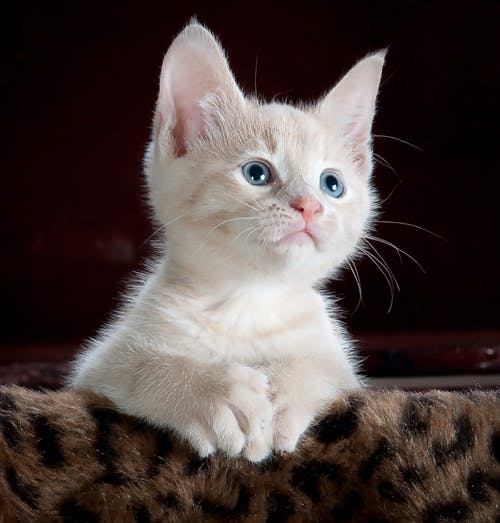

In [10]:
from IPython import display
display.Image(filename="images/cat.jpeg", width = 300, height = 300)

### Test performance of your code

In [11]:
%timeit np.sqrt(12)

1.26 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
%timeit 12**0.5

10.4 ns ± 0.346 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


### Make presentations

The one you're seeing here!

To actually show this as a presentation, the easiest thing is to do ``jupyter nbconvert --to slides <this file's name>.ipynb --post serve``

## Import and debug
in VS Code or PyCharm

In [13]:
!tree ./example_package -I "__pycache__"

./example_package
└── example.py

1 directory, 1 file


In [14]:
%cat ./example_package/example.py

class SampleClass:
    def __init__(self):
        self.x = 42

    def sample_method(self):
        return self.x


In [15]:
# Live-reload of imported modules
%load_ext autoreload
%autoreload 2

# Ensure that example_package is importable
import os
import sys
REPO_DIRNAME = os.path.abspath('.')
if REPO_DIRNAME not in sys.path:
    sys.path.append(REPO_DIRNAME)

# You can copy and edit this code to point to where your other Python files are.
# I use current dir because i'm lazy

In [16]:
# Import away!
from example_package.example import SampleClass

In [17]:
sc = SampleClass()
sc.sample_method()

42